## 1. Import and Setup

<a id="1s1"></a>
#### __`Step 1`__ Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from datetime import date, datetime

<a id="1s2"></a>
#### __`Step 2`__ Import CSV

In [2]:
df = pd.read_csv('cluster.csv')
df

,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
0,churn,Ms. Nicole Clarke,yes,1974.0,business,single,4907,3,4,1,...,4,3,4,3,3,3,3,4,3,4
1,nochurn,Mr. Jesse Scott,yes,1965.0,business,single,6724,1,1,1,...,5,3,4,5,5,5,5,1,5,2
2,churn,Mr. Christopher Carter,yes,1973.0,business,single,4365,3,3,3,...,1,4,4,3,3,2,3,2,3,1
3,nochurn,Ms. Jennifer Morgan,yes,1993.0,leisure,double,3849,1,1,1,...,4,4,5,4,4,4,4,4,4,3
4,nochurn,Mr. Michael White,yes,1989.0,business,single,5376,2,2,3,...,5,5,5,5,5,3,4,1,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15584,churn,Ms. Wendy Roberts,no,1988.0,business,double,4968,2,0,2,...,3,2,4,3,4,5,1,3,4,3
15585,churn,Ms. Sonya Smith,no,2000.0,business,double,4970,3,3,3,...,5,3,5,5,3,1,3,4,4,5
15586,nochurn,Mr. Maxwell Wright,yes,1964.0,business,single,4046,1,1,1,...,3,4,5,4,4,4,4,5,4,4
15587,nochurn,Mr. Gregory Moran,yes,1992.0,leisure,double,5155,4,3,4,...,5,4,5,5,2,5,4,3,4,5


<a id="1s3"></a>
#### __`Step 3`__ Check for duplicates

In [3]:
df[df.duplicated()]

,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
8195,nochurn,Ms. Abigail York,yes,1995.0,leisure,double,5098,5,5,5,...,4,5,5,3,3,4,3,3,3,5
9176,churn,Ms. Abigail Kennedy,yes,1991.0,business,suite,5932,3,3,2,...,3,3,3,3,4,1,4,3,4,3
9417,nochurn,Ms. Abigail Buchanan,yes,1972.0,business,double,6769,5,4,4,...,5,5,4,5,5,5,5,2,5,1


In [4]:
df.drop_duplicates(inplace = True)

<a id="s4"></a>
#### __`Step 4`__ Set index

In [5]:
df.reset_index(inplace=True)
df.set_index('index',inplace = True)
df

,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
index,,,,,,,,,,,,,,,,,,,,,
0,churn,Ms. Nicole Clarke,yes,1974.0,business,single,4907,3,4,1,...,4,3,4,3,3,3,3,4,3,4
1,nochurn,Mr. Jesse Scott,yes,1965.0,business,single,6724,1,1,1,...,5,3,4,5,5,5,5,1,5,2
2,churn,Mr. Christopher Carter,yes,1973.0,business,single,4365,3,3,3,...,1,4,4,3,3,2,3,2,3,1
3,nochurn,Ms. Jennifer Morgan,yes,1993.0,leisure,double,3849,1,1,1,...,4,4,5,4,4,4,4,4,4,3
4,nochurn,Mr. Michael White,yes,1989.0,business,single,5376,2,2,3,...,5,5,5,5,5,3,4,1,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15584,churn,Ms. Wendy Roberts,no,1988.0,business,double,4968,2,0,2,...,3,2,4,3,4,5,1,3,4,3
15585,churn,Ms. Sonya Smith,no,2000.0,business,double,4970,3,3,3,...,5,3,5,5,3,1,3,4,4,5
15586,nochurn,Mr. Maxwell Wright,yes,1964.0,business,single,4046,1,1,1,...,3,4,5,4,4,4,4,5,4,4


## Exploration

<a id="2s1"></a>
#### __`Step 1`__ Basic exploration

In [6]:
df.shape

(15586, 21)

In [7]:
df.columns

Index(['Churn', 'Name', 'Longevity', 'Year_Birth', 'TypeTravel', 'RoomType',
       'RewardPoints', 'Comfort', 'ReceptionSchedule', 'FoodDrink', 'Location',
       'Wifi', 'Amenities', 'Staff', 'OnlineBooking', 'PriceQuality',
       'RoomSpace', 'CheckOut', 'Checkin', 'Cleanliness', 'BarService'],
      dtype='object')

In [8]:
df.head(5)

,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
index,,,,,,,,,,,,,,,,,,,,,
0,churn,Ms. Nicole Clarke,yes,1974.0,business,single,4907,3,4,1,...,4,3,4,3,3,3,3,4,3,4
1,nochurn,Mr. Jesse Scott,yes,1965.0,business,single,6724,1,1,1,...,5,3,4,5,5,5,5,1,5,2
2,churn,Mr. Christopher Carter,yes,1973.0,business,single,4365,3,3,3,...,1,4,4,3,3,2,3,2,3,1
3,nochurn,Ms. Jennifer Morgan,yes,1993.0,leisure,double,3849,1,1,1,...,4,4,5,4,4,4,4,4,4,3
4,nochurn,Mr. Michael White,yes,1989.0,business,single,5376,2,2,3,...,5,5,5,5,5,3,4,1,3,5


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15586 entries, 0 to 15588
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Churn              15586 non-null  object 
 1   Name               15586 non-null  object 
 2   Longevity          15586 non-null  object 
 3   Year_Birth         15391 non-null  float64
 4   TypeTravel         15586 non-null  object 
 5   RoomType           15586 non-null  object 
 6   RewardPoints       15586 non-null  int64  
 7   Comfort            15586 non-null  int64  
 8   ReceptionSchedule  15586 non-null  int64  
 9   FoodDrink          15586 non-null  int64  
 10  Location           15586 non-null  int64  
 11  Wifi               15586 non-null  int64  
 12  Amenities          15586 non-null  int64  
 13  Staff              15586 non-null  int64  
 14  OnlineBooking      15586 non-null  int64  
 15  PriceQuality       15586 non-null  int64  
 16  RoomSpace          155

<a id="2s2"></a>
#### __`Step 2`__ Statistical exploration

**Numerical variables**

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,15391.0,1981.705607,15.179757,1936.0,1970.0,1981.0,1994.00,2014.0
RewardPoints,15586.0,5022.418581,1027.940126,409.0,4445.0,5088.0,5648.75,6950.0
Comfort,15586.0,2.841332,1.388541,0.0,2.0,3.0,4.00,5.0
ReceptionSchedule,15586.0,2.997049,1.519035,0.0,2.0,3.0,4.00,5.0
FoodDrink,15586.0,2.844412,1.436937,0.0,2.0,3.0,4.00,5.0
Location,15586.0,2.985821,1.299438,1.0,2.0,3.0,4.00,5.0
Wifi,15586.0,3.244963,1.327064,0.0,2.0,3.0,4.00,6.0
Amenities,15586.0,3.374631,1.352419,0.0,2.0,4.0,4.00,5.0
Staff,15586.0,3.506288,1.319625,1.0,3.0,4.0,5.00,5.0
OnlineBooking,15586.0,3.454190,1.310401,0.0,2.0,4.0,5.00,5.0


In [11]:
df.skew().T

C:\Users\ricar\AppData\Local\Temp/ipykernel_25092/1956230054.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew().T


Year_Birth          -0.003724
RewardPoints        -0.453744
Comfort             -0.100806
ReceptionSchedule   -0.260518
FoodDrink           -0.123543
Location            -0.050057
Wifi                -0.171105
Amenities           -0.599424
Staff               -0.554468
OnlineBooking       -0.472109
PriceQuality        -0.503290
RoomSpace           -0.482872
CheckOut            -0.750667
Checkin             -0.382822
Cleanliness         -0.745109
BarService          -0.358340
dtype: float64

All skewness values look within what is to be expected

In [12]:
df.describe(include = ['O']).T

,count,unique,top,freq
Churn,15586,2,nochurn,8475
Name,15586,14227,Mr. Michael Smith,9
Longevity,15586,3,yes,12545
TypeTravel,15586,2,business,10754
RoomType,15586,3,single,7442


Verificar as variáveis categóricas e discretas

In [13]:
df[df['RewardPoints'].isnull()]['RewardPoints'].count()

0

In [14]:
df[df['RewardPoints'].isna()]['RewardPoints'].count()

0

In [15]:
df['Churn'].value_counts()

nochurn    8475
churn      7111
Name: Churn, dtype: int64

In [16]:
df['Longevity'].value_counts()

yes    12545
no      2874
y        167
Name: Longevity, dtype: int64

In [17]:
df['TypeTravel'].value_counts()

business    10754
leisure      4832
Name: TypeTravel, dtype: int64

In [18]:
df['RoomType'].value_counts()

single    7442
double    7019
suite     1125
Name: RoomType, dtype: int64

In [19]:
df[df['Year_Birth'].isna()]

,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
index,,,,,,,,,,,,,,,,,,,,,
27,nochurn,Ms. Emily Thomas,yes,NaN,leisure,double,4760,0,5,0,...,5,0,3,5,4,4,5,4,4,5
126,churn,Ms. Elizabeth Tyler,yes,NaN,business,double,5151,2,2,2,...,2,2,2,2,3,4,3,2,4,2
147,nochurn,Ms. Elizabeth Santos,no,NaN,business,single,5370,4,4,4,...,2,4,2,2,5,4,4,4,4,2
168,nochurn,Ms. Elizabeth Lawson,yes,NaN,business,single,3669,1,1,1,...,5,5,5,5,4,5,5,4,4,5
170,nochurn,Ms. Elizabeth Morgan,yes,NaN,business,single,4593,1,1,1,...,2,4,5,4,4,4,5,2,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15279,nochurn,Ms. Elizabeth Williams,yes,NaN,leisure,double,5769,0,4,0,...,3,4,1,2,2,0,2,5,2,2
15302,churn,Mr. Edward Randall,y,NaN,leisure,double,4196,4,5,5,...,1,5,1,1,5,4,4,3,4,1
15388,nochurn,Ms. Elizabeth Carrillo,yes,NaN,business,single,6448,3,3,3,...,4,5,4,5,5,5,5,3,5,5


In [20]:
df['Year_Birth'].isna().sum()

195

Há um problema de unknown values relativos ao year birth. Vamos ver se a distribuição é normal para substituir os valores nao existentes pela média

<AxesSubplot:>

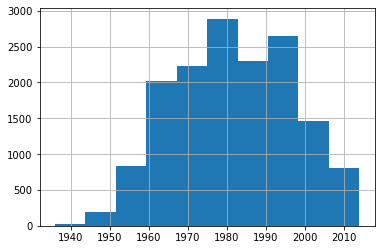

In [21]:
df['Year_Birth'].hist()

<AxesSubplot:>

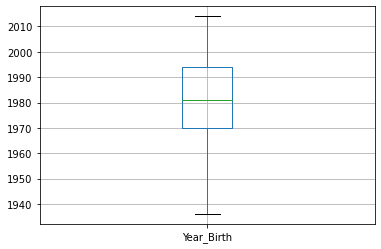

In [22]:
df.boxplot('Year_Birth')

Analisar coluna Wifi por ter pelo menos um valor de 6

In [23]:
df['Wifi'].value_counts()

4    3703
5    3445
3    3347
2    3245
1    1792
6      36
0      18
Name: Wifi, dtype: int64

In [24]:
df['Name'].value_counts()

Mr. Michael Smith     9
Mr. John Smith        7
Ms. Amanda Smith      7
Mr. Michael Davis     6
Ms. Jennifer Smith    6
                     ..
Ms. Laurie Smith      1
Mr. Aaron Cox         1
Ms. Natasha Estes     1
Ms. Beverly Lee       1
Mr. Steven Mendez     1
Name: Name, Length: 14227, dtype: int64

Set a copy of df for further transformations

In [25]:
dft = df.copy()

**Quick transformations**

Create gender

In [26]:
dft['Gender'] = dft['Name'].str.split('. ', expand = True)[0]
dft.drop(columns = "Name", inplace = True)

**Use KNN inputer for missing values**
Assuming they are MAR

In [27]:
dft.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Churn,15586,2,nochurn,8475,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Longevity,15586,3,yes,12545,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year_Birth,15391.0,NaN,NaN,NaN,1981.705607,15.179757,1936.0,1970.0,1981.0,1994.0,2014.0
TypeTravel,15586,2,business,10754,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RoomType,15586,3,single,7442,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RewardPoints,15586.0,NaN,NaN,NaN,5022.418581,1027.940126,409.0,4445.0,5088.0,5648.75,6950.0
Comfort,15586.0,NaN,NaN,NaN,2.841332,1.388541,0.0,2.0,3.0,4.0,5.0
ReceptionSchedule,15586.0,NaN,NaN,NaN,2.997049,1.519035,0.0,2.0,3.0,4.0,5.0
FoodDrink,15586.0,NaN,NaN,NaN,2.844412,1.436937,0.0,2.0,3.0,4.0,5.0
Location,15586.0,NaN,NaN,NaN,2.985821,1.299438,1.0,2.0,3.0,4.0,5.0


In [28]:
dft_numerical = dft.drop(columns=["Gender","Longevity","TypeTravel","Churn","RoomType"])

imputer = KNNImputer(n_neighbors=3, weights="uniform")
imputed_matrix = imputer.fit_transform(dft_numerical)

dft_cleaned = pd.DataFrame(data=imputed_matrix, columns=dft_numerical.columns, index=dft_numerical.index)

dft_cleaned['Year_Birth'][dft['Year_Birth'].isna()]

index
27       1999.666667
126      1982.333333
147      1999.666667
168      1975.000000
170      1988.333333
            ...     
15279    1970.666667
15302    1992.666667
15388    1963.000000
15445    1974.333333
15568    1988.333333
Name: Year_Birth, Length: 195, dtype: float64

In [36]:
print(dft['Year_Birth'].mean())
print(dft_cleaned['Year_Birth'].mean())
print(dft['Year_Birth'].std())
print(dft_cleaned['Year_Birth'].std())

1981.7056071730233
1981.6987039650955
15.179757018426182
15.127127024416488


In [29]:
#dft['Year_Birth'] = pd.to_datetime(dft['Year_Birth'], format='%Y')
dft_cleaned['Year_Birth'].astype("int32")

index
0        1974
1        1965
2        1973
3        1993
4        1989
         ... 
15584    1988
15585    2000
15586    1964
15587    1992
15588    1983
Name: Year_Birth, Length: 15586, dtype: int32

#**Use mean for missing values in Year_Birth**

In [30]:
#df['Year_Birth'] = df['Year_Birth'].fillna(df['Year_Birth'].mean())

Get dummies for Churn, Longevity, TypeTravel, RoomType and Gender

In [31]:
#old code
#dft['Longevity'] = dft['Longevity'].replace({'y':1,'yes':1,'no':0}).astype(int)
#dft['Churn'] = dft['Churn'].replace({'churn':1,'nochurn':0}).astype(int)
#dft['TypeTravel'] = dft['TypeTravel'].replace({'business':1,'leisure':0}).astype(int)
#dft['Suite'] = dft['RoomType'].replace({'suite':1,'double':0,'single':0}).astype(int)
#dft['DoubleRoom'] = dft['RoomType'].replace({'suite':0,'double':1,'single':0}).astype(int)
#dft['Age'] = date.today() - dft['Year_Birth']

In [32]:
dft_cleaned['Longevity'] = dft_cleaned['Longevity'].replace({'y':'yes'})
pd.get_dummies(dft_cleaned, columns = ['Churn','Longevity','TypeTravel','RoomType','Gender'], drop_first = True)
dft_cleaned['Age'] = date.today().year - dft_cleaned['Year_Birth']
dft_cleaned['Wifi'] = dft_cleaned['Wifi'].replace(6,5)
dft_cleaned = dft_cleaned.drop(['RoomType'],axis=1)

KeyError: 'Longevity'

In [ ]:
dft_cleaned.head(5)

In [ ]:
dft_cleaned.describe(include='all').T

In [ ]:
dft_cleaned.dtypes

**Top 50 clients**

In [ ]:
df['Name'].duplicated().sum()

In [ ]:
##df[df['Name'].duplicated()].head(5)
##dft = df.groupby('Name')['Name'].value_counts(normalize=True).unstack().fillna(0)
df = df.groupby('Name')['Name'].count().sort_values(0,False)
df.head(50)